# Koelen van metalen buizen
<!-- vervang bovenstaande titel -->

# Introductie

In het boek wordt in hoofdstuk 2 geschreven over warmtetransport. Dat kan op drie manieren plaatsvinden. Het is niet eenvoudig om deze drie verschillende vormen uit elkaar te houden. In het vak 'Fysische Transportverschijnselen', dat in het tweede jaar wordt gegeven, zal je zien dat de natuurkunde achter deze verschillende vormen van warmtetransport ook best ingewikkeld is. 

```{exercise}
Welke vormen van warmtetransport bestaan er?
```

In deze proef proberen we een inschatting te maken van de ordegrootte van de verschillende vormen van warmtetransport bij de koeling van een metalen buis aan lucht. 

# Theorie

# Methode en materialen

## Ontwerp

## Materialen

- standaard met twee thermisch geïsoleerde grijparmen
- metalen buis me bijpassende dop
- thermometer (infrarood of thermokoppel)
- knijper voor bevestigen thermokoppel op buis
- warm water tussen 60 en 80 graden Celsius
- (evt) schuifmaat voor bepalen dimensies buis

## Procedure

Stop de buis in warm water en laat deze gedurende een paar minuten zitten om thermisch evenwicht te bereiken. Beantwoord ondertussen de volgende vragen met behulp van de tabel:

| Materiaal | $\rho$ in $\text{kg/m}^3$ | $C$ in $\text{J} / \text{(kg K)}$ |
| --------- | --------- | ------------------ |
| messing   | 8,73E3    | 3,8E2 |
| aluminium | 2,7E3     | 8,8E2 | 
| staal     | 7,9E3     | 4,7E2 | 


```{exercise} constanten
:label: ex_const
Wat is het buitenoppervlak van de buis?
Wat is de warmtecapaciteit van de buis?
Wat is de omgevingstemperatuur?
```



Pak de buis op met thermisch isolerende handschoenen (of direct met de geïsoleerde grijparm) en plaats deze in de grijparm met isolatieschoentjes.
Positioneer de thermometer voor optimale temperatuurlezing.
Meet als functie van tijd hoe lichaam koelt.
Wacht voldoende lang zodat je de karakteristieke tijd $\tau$ voor de afkoeling kan bepalen.

```{exercise} Configuratie
:label: ex_conf
Maakt het uit in welke richting je de (cilindrische) as van de buis legt? En waarom zit er een dop bij de buis?
```

```{solution} ex_conf

```

Doe dit voor twee of drie configuraties:

1. De buis met de as in verticale richting en afgesloten met dop.
2. De buis met de as in verticale richting *zonder* dop.
3. (alleen bij voldoende tijd) De buis met de as in horizontale richting en afgesloten met dop.

```{warning} Veiligheid
Zorg ervoor dat je de buis niet aanraakt terwijl deze warm is. De metalen buis geleidt warmte. Zelfs een temperatuur van 60 graden celsius is daarom al onaangenaam hoog. Hou de pan met het warme water ook op een veilige plek zodat deze niet kan omkiepen en het warme water over de grond opspat.
```


## Data analyse

- Bepaal de karakteristieke tijd $\tau$ waarin de temperatuur van buis afneemt. Deze kan verschillend zijn voor de drie bovenstaande configuraties. 
- Bereken hieruit de warmteoverdrachtscoëfficiënt. 
- Vergelijk je resultaten met je groepsgenoten die een vergelijkbare buis hebben gemeten (dit kan klassikaal).
- Welk deel van de warmteoverdrachtscoëfficiënt verwacht je dat gegeven is door de geleiding, straling en convectie? Onderbouw je redenering.

# Resultaten

In [1]:
import numpy as np

T_dop = np.array([61.3, 60.8, 60.3, 59.1, 58.4, 57.2, 56.1, 55.6, 54.6, 54.1, 53.0, 52.5, 52.0, 51.5, 50.9, 50.3, 49.8, 49.2, 48.6, 48.1, 47.6, 47.1, 46.6, 46.1, 45.6, 45.1, 44.6, 44.2, 44.2, 43.7, 43.2, 43.2, 42.7, 42.2, 41.9, 41.7, 41.4, 41.0, 40.9, 40.5, 40.2, 39.9, 39.7, 39.5, 39.2, 39.2, 38.7, 38.7, 38.6, 38.2, 37.8, 37.6]) + 273.15
t_dop = np.arange(0, 5 * len(T_dop), 5)

T_open = np.array([45.1, 44.6, 44.0, 43.5, 43.0, 43.0, 42.5, 42.0, 41.5, 41.0, 41.0, 40.5, 40.5, 40.0, 40.0, 39.5, 39.1, 39.1, 38.6, 38.1, 38.1, 37.6, 37.6, 37.1, 36.6, 36.6, 36.1, 35.7, 35.2, 34.8, 34.8, 34.3, 34.0, 33.9, 33.9, 34.0, 33.5, 33.5, 33.1, 33.0, 32.7, 32.6, 32.5, 32.4, 32.2, 32.1, 32.1, 32.1, 31.7, 31.6, 31.5 ]) + 273.15#6 min 5 sec
t_open = np.arange(0, 5 * len(T_open), 5)

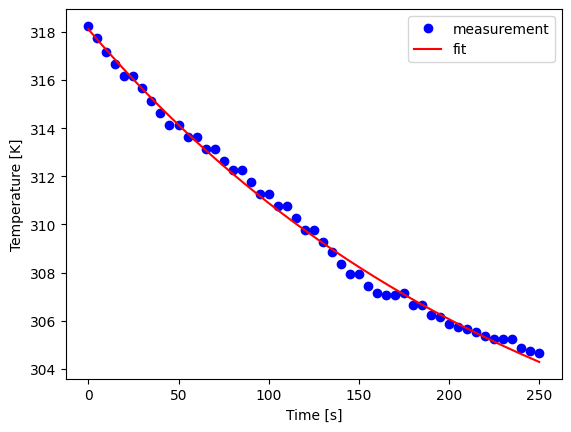

tau = 247.8592759275625 s
h   = 9.968284532812904 W/m^2 K
56.03605550504679


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Model: Newtonse afkoeling (T_omg vast) 
def exp_func_fixed(t, A, tau):
    return A * np.exp(-t / tau) + T_omg


# Gegeven omgevingstemperatuur 
T_omg = 23.2 + 273.15   # K


# Geometrie buis 
L = 0.102 + 1 * 0.005  # lengte buis [m]
d = 0.030 + 1 * 0.005  # buitendiameter [m]
dikte = 0.0015         # wanddikte [m]

R_out = d / 2
R_in  = R_out - dikte


# Materiaal (messing)
rho = 8.73e3   # kg/m^3
c   = 3.8e2    # J/(kg K)


# Buitenoppervlakte zonder dop 
A_mantel        = 2 * np.pi * R_out * L
A_binnenmantel  = 2 * np.pi * R_in  * L
A_open_top      = np.pi * (R_out**2 - R_in**2)

A_exp = A_mantel + A_binnenmantel + A_open_top


# Massa en warmtecapaciteit 
volume = np.pi * L * (R_out**2 - R_in**2)
massa  = rho * volume
C_th   = massa * c     # J/K


# Meetdata 
times = t_open
temps = T_open


# Exponentiële fit (tau > 0 afgedwongen) 
popt, pcov = curve_fit(
    exp_func_fixed,
    times,
    temps,
    p0=[temps[0] - T_omg, 1000],
    bounds=([0, 0], [np.inf, np.inf]),
    maxfev=6000
)

A_exp_fit, tau_exp = popt


# Plot 
t_fit = np.linspace(0, times[-1], 500)
T_fit = exp_func_fixed(t_fit, *popt)

plt.figure()
plt.plot(times, temps, 'bo', label='measurement')
plt.plot(t_fit, T_fit, 'r-', label='fit')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.legend()
plt.show()


# Warmteoverdrachtscoëfficiënt
h_exp = C_th / (tau_exp * A_exp)

print("tau =", tau_exp, "s")
print("h   =", h_exp, "W/m^2 K")
# Sla figuren op met  
# 
# plt.savefig("Figuren/naam.png", dpi=450)

print(C_th)

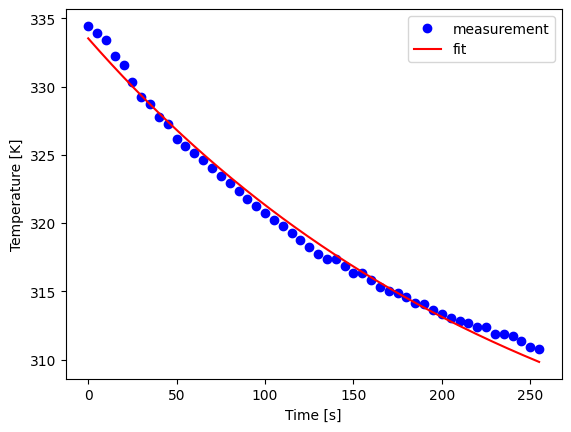

tau = 251.17136198742477 s
h   = 17.529055637292046 W/m^2 K


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Model: Newtonse afkoeling (T_omg vast) 
def exp_func_fixed(t, A, tau):
    return A * np.exp(-t / tau) + T_omg


# Gegeven omgevingstemperatuur
T_omg = 23.2 + 273.15   # K


# Geometrie buis 
L = 0.102 + 1 * 0.005  # lengte buis [m]
d = 0.030 + 1 * 0.005  # buitendiameter [m]
dikte = 0.0015         # wanddikte [m]

R_out = d / 2
R_in  = R_out - dikte


# Materiaal (messing) 
rho = 8.73e3   # kg/m^3
c   = 3.8e2    # J/(kg K)


# Buitenoppervlakte met dop 
A_mantel = 2 * np.pi * R_out * L
A_top    = np.pi * R_out**2

A_exp = A_mantel + A_top


# Massa en warmtecapaciteit 
volume = np.pi * L * (R_out**2 - R_in**2)
massa  = rho * volume
C_th   = massa * c     # J/K


# Meetdata 
times = t_dop
temps = T_dop


# Exponentiële fit (tau > 0 afgedwongen) 
popt, pcov = curve_fit(
    exp_func_fixed,
    times,
    temps,
    p0=[temps[0] - T_omg, 1000],
    bounds=([0, 0], [np.inf, np.inf]),
    maxfev=6000
)

A_exp_fit, tau_exp = popt


# Plot 
t_fit = np.linspace(0, times[-1], 500)
T_fit = exp_func_fixed(t_fit, *popt)

plt.figure()
plt.plot(times, temps, 'bo', label='measurement')
plt.plot(t_fit, T_fit, 'r-', label='fit')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.legend()
plt.show()


# Warmteoverdrachtscoëfficiënt 
h_exp = C_th / (tau_exp * A_exp)

print("tau =", tau_exp, "s")
print("h   =", h_exp, "W/m^2 K")

# Sla figuren op met  
# 
# plt.savefig("Figuren/naam.png", dpi=450)

# Discussie en conclusie

### Discussie

De afkoelmetingen tonen een duidelijk verschil tussen de configuratie met en zonder dop. Dit verschil wordt veroorzaakt door het kleinere effectieve buitenoppervlak bij de buis met dop, waardoor de warmteoverdracht per eenheid oppervlak groter wordt. De resultaten worden beïnvloed door praktische factoren zoals warmteverlies via de grijparm en meetonzekerheden in de temperatuurmeting, maar deze effecten veranderen de onderlinge vergelijking niet wezenlijk.
#your code/answer

### Conclusie

Voor de buis zonder dop is een warmteoverdrachtscoëfficiënt van $h = 9{,}97 \mathrm{Wm^{-2}K^{-1}}$ gevonden, terwijl voor de buis met dop $h = 17{,}53 \mathrm{Wm^{-2}K^{-1}}$ is bepaald. Beide waarden zijn fysisch plausibel en laten zien dat de configuratie van de buis een meetbaar effect heeft op de warmteoverdracht naar de omgeving.

